# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands-on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

- Use the `.map()` and `.apply()` methods to apply a function to a pandas Series or DataFrame 
- Perform operations to change the structure of pandas DataFrames 
- Change the index of a pandas DataFrame 
- Change data types of columns in pandas DataFrames 

## Let's get started 

Import the file `'turnstile_180901.txt'`. 

In [1]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import the file 'turnstile_180901.txt'
df = pd.read_csv('turnstile_180901.txt')

# Print the number of rows ans columns in df
print(df.shape)

# Print the first five rows of df
df.head()

(197625, 11)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


Rename all the columns to lower case: 

In [3]:
# We can check and see what the columns look like with this code:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [4]:
# Rename all the columns to lower case
# Rename all columns to lowercase
df.rename(columns={col: col.lower() for col in df.columns}, inplace=True)

# Check the updated columns
print(df.columns)


Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               '],
      dtype='object')


In [5]:
# Now let's check and make sure that worked
df.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               '],
      dtype='object')

Change the index to `'linename'`: 

In [6]:
# Change the index to 'linename'
# Change the index to 'linename'
df.set_index('linename', inplace=True)

# Verify the index change
print(df.head())


           c/a  unit       scp station division        date      time  \
linename                                                                
NQR456W   A002  R051  02-00-00   59 ST      BMT  08/25/2018  00:00:00   
NQR456W   A002  R051  02-00-00   59 ST      BMT  08/25/2018  04:00:00   
NQR456W   A002  R051  02-00-00   59 ST      BMT  08/25/2018  08:00:00   
NQR456W   A002  R051  02-00-00   59 ST      BMT  08/25/2018  12:00:00   
NQR456W   A002  R051  02-00-00   59 ST      BMT  08/25/2018  16:00:00   

             desc  entries  \
linename                     
NQR456W   REGULAR  6736067   
NQR456W   REGULAR  6736087   
NQR456W   REGULAR  6736105   
NQR456W   REGULAR  6736180   
NQR456W   REGULAR  6736349   

          exits                                                                 
linename                                                                        
NQR456W                                             2283184                     
NQR456W                           

Reset the index: 

In [7]:
# Reset the index
# Reset the index
df.reset_index(inplace=True)

# Verify the index reset
print(df.head())



  linename   c/a  unit       scp station division        date      time  \
0  NQR456W  A002  R051  02-00-00   59 ST      BMT  08/25/2018  00:00:00   
1  NQR456W  A002  R051  02-00-00   59 ST      BMT  08/25/2018  04:00:00   
2  NQR456W  A002  R051  02-00-00   59 ST      BMT  08/25/2018  08:00:00   
3  NQR456W  A002  R051  02-00-00   59 ST      BMT  08/25/2018  12:00:00   
4  NQR456W  A002  R051  02-00-00   59 ST      BMT  08/25/2018  16:00:00   

      desc  entries  \
0  REGULAR  6736067   
1  REGULAR  6736087   
2  REGULAR  6736105   
3  REGULAR  6736180   
4  REGULAR  6736349   

   exits                                                                 
0                                            2283184                     
1                                            2283188                     
2                                            2283229                     
3                                            2283314                     
4                                       

Create another column `'Num_Lines'` that is a count of how many lines pass through a station. Then sort your DataFrame by this column in descending order. 

*Hint: According to the [data dictionary](http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt), LINENAME represents all train lines that can be boarded at a given station. Normally lines are represented by one character. For example, LINENAME 456NQR represents trains 4, 5, 6, N, Q, and R.*

In [8]:
# Add a new 'num_lines' column
# Add a new 'num_lines' column
df['num_lines'] = df['linename'].apply(len)

# Verify the new column addition
print(df.head())



  linename   c/a  unit       scp station division        date      time  \
0  NQR456W  A002  R051  02-00-00   59 ST      BMT  08/25/2018  00:00:00   
1  NQR456W  A002  R051  02-00-00   59 ST      BMT  08/25/2018  04:00:00   
2  NQR456W  A002  R051  02-00-00   59 ST      BMT  08/25/2018  08:00:00   
3  NQR456W  A002  R051  02-00-00   59 ST      BMT  08/25/2018  12:00:00   
4  NQR456W  A002  R051  02-00-00   59 ST      BMT  08/25/2018  16:00:00   

      desc  entries  \
0  REGULAR  6736067   
1  REGULAR  6736087   
2  REGULAR  6736105   
3  REGULAR  6736180   
4  REGULAR  6736349   

   exits                                                                 \
0                                            2283184                      
1                                            2283188                      
2                                            2283229                      
3                                            2283314                      
4                                  

Write a function to clean column names: 

In [9]:
# Before we start cleaning, let's look at what we've got

df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               ',
       'num_lines'],
      dtype='object')

In [10]:
def clean(col_name):
    # Clean the column name in any way you want to. Hint: think back to str methods 
    cleaned = None
    return cleaned

In [11]:
# Use the above function to clean the column names
def clean(col_name):
    # Clean the column name in any way you want to. Hint: think back to str methods 
    cleaned = col_name.strip().lower().replace(' ', '_')  # Example: Strip leading/trailing spaces, convert to lowercase, and replace spaces with underscores
    return cleaned

# Use the above function to clean the column names
df.columns = df.columns.map(clean)

# Verify the cleaned column names
print(df.columns)


Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'num_lines'],
      dtype='object')


In [12]:
# Check to ensure the column names were cleaned
df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'num_lines'],
      dtype='object')

- Change the data type of the `'date'` column to a date 
- Add a new column `'day_of_week'` that represents the day of the week

In [13]:
# Convert the data type of the 'date' column to a date


# Add a new column 'day_of_week' that represents the day of the week 
# Convert the data type of the 'date' column to a date
df['date'] = pd.to_datetime(df['date'])

# Add a new column 'day_of_week' that represents the day of the week
df['day_of_week'] = df['date'].dt.day_name()

# Verify the changes
print(df[['date', 'day_of_week']].head())


        date day_of_week
0 2018-08-25    Saturday
1 2018-08-25    Saturday
2 2018-08-25    Saturday
3 2018-08-25    Saturday
4 2018-08-25    Saturday


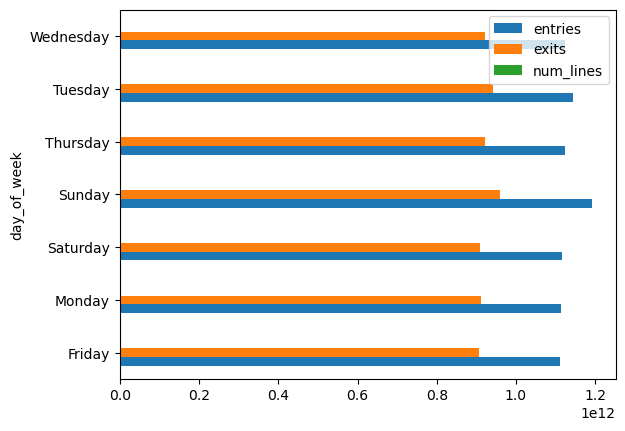

In [14]:
# Group the data by day of week and plot the sum of the numeric columns
grouped = df.groupby('day_of_week').sum(numeric_only = True)
grouped.plot(kind='barh')
plt.show()

- Remove the index of `grouped` 
- Print the first five rows of `grouped` 

In [15]:
# Reset the index of grouped
# Reset the index of grouped
grouped = grouped.reset_index()

# Print the first five rows of grouped
print(grouped.head())



  day_of_week        entries         exits  num_lines
0      Friday  1110224700078  906799065337      75573
1      Monday  1114237052454  911938153513      76110
2    Saturday  1115661545514  909142081474      74725
3      Sunday  1192306179082  959223750461      75306
4    Thursday  1122723988662  920691927110      76607


Add a new column `'is_weekend'` that maps the `'day_of_week'` column using the dictionary `weekend_map` 

In [16]:
# Use this dictionary to create a new column 
weekend_map = {0:False, 1:False, 2:False, 3:False, 4:False, 5:True, 6:True}

# Add a new column 'is_weekend' that maps the 'day_of_week' column using weekend_map
grouped['is_weekend'] = grouped['day_of_week'].map(weekend_map)

In [21]:
# Group the data by weekend/weekday and plot the sum of the numeric columns
import matplotlib.pyplot as plt

# Check if the DataFrame is empty
if not wkend.empty:
    # Check if the columns 'entries' and 'exits' exist in wkend
    if 'entries' in wkend.columns and 'exits' in wkend.columns:
        # Plot the sum of the numeric columns
        wkend[['entries', 'exits']].plot(kind='barh')
        plt.xlabel('Total')
        plt.ylabel('Weekend (1) / Weekday (0)')
        plt.title('Sum of Entries and Exits by Weekend/Weekday')
        plt.show()
    else:
        print("Columns 'entries' and 'exits' not found in the grouped DataFrame.")
else:
    print("The grouped DataFrame is empty.")


The grouped DataFrame is empty.


Remove the `'c/a'` and `'scp'` columns. 

In [22]:
# Remove the 'c/a' and 'scp' columns
df =  df.drop(['c/a', 'scp'], axis=1)
df.head(2)

,linename,unit,station,division,date,time,desc,entries,exits,num_lines,day_of_week
0,NQR456W,R051,59 ST,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,7,Saturday
1,NQR456W,R051,59 ST,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,7,Saturday


## Analysis Question 

What is misleading about the day of week and weekend/weekday charts you just plotted?

In [23]:
# Your answer here 
# The charts plotted based on the day of the week and weekend/weekday might be misleading if the dataset does not cover a continuous period or if there are missing data points. For example:

# Incomplete Data Coverage: If the dataset does not cover a continuous period, such as missing weekends or weekdays, the representation of weekends and weekdays may not accurately reflect actual patterns. For instance, if the dataset only includes weekdays and no weekends, the comparison between weekends and weekdays would be misleading.

# Missing Data Points: If there are missing data points for certain days or times, it could skew the analysis. For instance, if there are missing entries for weekends, the total counts for weekends would be underestimated, leading to a biased comparison between weekends and weekdays.

# Data Anomalies: Sometimes, there could be anomalies in the data that affect the analysis. For instance, if there are outliers or irregularities in the data for specific days or times, it could distort the overall trends and lead to misleading interpretations.

# Sampling Bias: If the dataset is not representative of the entire population or if there is a sampling bias, the analysis may not accurately reflect the true patterns. For instance, if the dataset disproportionately represents certain stations or time periods, it could bias the comparison between weekends and weekdays.